      lean  year
0   2.9642  1975
1   2.9644  1976
2   2.9656  1977
3   2.9667  1978
4   2.9673  1979
5   2.9688  1980
6   2.9696  1981
7   2.9698  1982
8   2.9713  1983
9   2.9717  1984
10  2.9725  1985
11  2.9742  1986
12  2.9757  1987


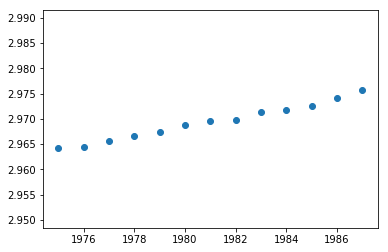

In [2]:
import pandas
import matplotlib.pyplot as plt

pisa = pandas.DataFrame({"year": range(1975, 1988), 
                         "lean": [2.9642, 2.9644, 2.9656, 2.9667, 2.9673, 2.9688, 2.9696, 
                                  2.9698, 2.9713, 2.9717, 2.9725, 2.9742, 2.9757]})

print(pisa)
plt.scatter(pisa['year'], pisa['lean'])
plt.show()

In [3]:
import statsmodels.api as sm

y = pisa.lean # target
X = pisa.year  # features
X = sm.add_constant(X)  # add a column of 1's as the constant term

# OLS -- Ordinary Least Squares Fit
linear = sm.OLS(y, X)
# fit modelb
linearfit = linear.fit()

linearfit.summary()

/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lean   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     904.1
Date:                Mon, 29 May 2017   Prob (F-statistic):           6.50e-12
Time:                        21:44:09   Log-Likelihood:                 83.777
No. Observations:                  13   AIC:                            -163.6
Df Residuals:                      11   BIC:                            -162.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.1233      0.061     18.297      0.000         0.988     1.258
year           0.0009    3.1e-05     30.069      0.000         0.001     0.001
==============================================================================
Omnibus:                        0.310   Durbin-Watson:                   1.642
Prob(Omnibus):                  0.856   Jarque-Bera (JB):                0.450
Skew:                           0.094   Prob(JB):                        0.799
Kurtosis:                       2.108   Cond. No.                     1.05e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
X 

,const,year
0,1,1975
1,1,1976
2,1,1977
3,1,1978
4,1,1979
5,1,1980
6,1,1981
7,1,1982
8,1,1983
9,1,1984


In [5]:
# Our predicted values of y
yhat = linearfit.predict(X)
print(yhat)

residuals = yhat - y
residuals

[ 2.96377802  2.96470989  2.96564176  2.96657363  2.96750549  2.96843736
  2.96936923  2.9703011   2.97123297  2.97216484  2.9730967   2.97402857
  2.97496044]


0    -0.000422
1     0.000310
2     0.000042
3    -0.000126
4     0.000205
5    -0.000363
6    -0.000231
7     0.000501
8    -0.000067
9     0.000465
10    0.000597
11   -0.000171
12   -0.000740
Name: lean, dtype: float64

(array([ 1.,  3.,  4.,  2.,  3.]),
 array([ -7.39560440e-04,  -4.72307692e-04,  -2.05054945e-04,
          6.21978022e-05,   3.29450549e-04,   5.96703297e-04]),
 <a list of 5 Patch objects>)

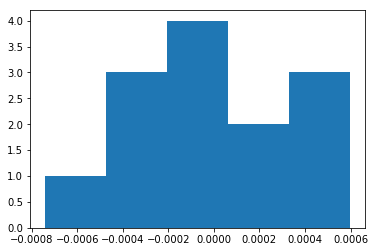

In [7]:
%matplotlib inline
plt.hist(residuals, bins=5)


In [9]:
import numpy as np

# sum the (predicted - observed) squared
SSE = np.sum((y.values-yhat)**2)
RSS = np.sum((np.mean(y.values)-yhat)**2)
TSS = np.sum((y.values - np.mean(y.values))**2)
print(str(SSE) +"  "+ str(RSS) +"   "+ str(TSS))

1.92285714286e-06  0.000158044835165   0.000159967692308


The coefficient of determination, also known as R-Squared, is a great measure of linear dependence. It is a single number which tells us what the percentage of variation in the target variable is explained by our model.

This single measure tells us what percentage of the total variation of the data our model is accounting for. Correspondingly, the R2 exists between 0 and 1.

In [11]:
R2 = 1 - (SSE/TSS)
R2

0.98797971568435239

In [12]:
# Print the models summary
#print(linearfit.summary())

#The models parameters
print("\n",linearfit.params)

delta = linearfit.params["year"] * 15.0
delta


 const    1.123338
year     0.000932
dtype: float64


0.013978021978021116

In [14]:
# Enter your code here.
denom = np.sum((X['year'] - np.mean(X['year'])**2))
print(denom)
denom = (len(X) -2) * denom
print(denom)

s2b1 = SSE / denom
s2b1
               

-50990940.0
-560900340.0


-3.4281618421848841e-15

[ 0.02297204  0.02441481  0.02596406  0.02762847  0.0294174   0.031341
  0.03341025  0.03563701  0.03803403  0.04061509  0.04339497  0.04638952
  0.04961567  0.05309149  0.05683617  0.06086996  0.0652142   0.06989116
  0.07492395  0.08033633  0.08615245  0.09239652  0.0990924   0.10626304
  0.11392986  0.12211193  0.13082504  0.14008063  0.14988449  0.16023537
  0.17112343  0.18252859  0.1944188   0.20674834  0.21945618  0.23246464
  0.2456783   0.2589835   0.27224841  0.28532401  0.29804594  0.31023748
  0.32171351  0.33228555  0.34176766  0.34998293  0.35677032  0.36199128
  0.36553585  0.36732769  0.36732769  0.36553585  0.36199128  0.35677032
  0.34998293  0.34176766  0.33228555  0.32171351  0.31023748  0.29804594
  0.28532401  0.27224841  0.2589835   0.2456783   0.23246464  0.21945618
  0.20674834  0.1944188   0.18252859  0.17112343  0.16023537  0.14988449
  0.14008063  0.13082504  0.12211193  0.11392986  0.10626304  0.0990924
  0.09239652  0.08615245  0.08033633  0.07492395  0.06

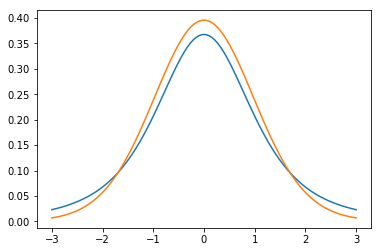

In [15]:
from scipy.stats import t

# 100 values between -3 and 3
x = np.linspace(-3,3,100)

# Compute the pdf with 3 degrees of freedom
print(t.pdf(x=x, df=3))

tdist3 = t.pdf(x=x, df=3)
tdist30 = t.pdf(x=x, df=30)

plt.plot(x, tdist3)
plt.plot(x, tdist30)